Now that we have scraped and cleaned the 2003 and 2020 lists from Rolling Stone, we will now start to compare and visualize trends from both lists

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading files
list_2003 = pd.read_csv('list_top500_2003_clean.csv')
list_2020 = pd.read_csv('list_top500_2020_clean.csv')

# Who are the most common artists on each list?

In [3]:
artists_2003 = list_2003.Artist.value_counts()
artists_2003.head(10)

The Beatles           10
The Rolling Stones    10
Bob Dylan             10
Bruce Springsteen      8
The Who                7
U2                     5
Radiohead              5
Led Zeppelin           5
Elton John             5
David Bowie            5
Name: Artist, dtype: int64

In [4]:
artists_2020 = list_2020.Artist.value_counts()
artists_2020.head(10)

The Beatles               9
Bob Dylan                 7
Neil Young                6
The Rolling Stones        6
Kanye West                6
Led Zeppelin              5
Bruce Springsteen         5
David Bowie               5
The Who                   4
The Velvet Underground    4
Name: Artist, dtype: int64

Both lists have a large abundance of classic rock artists (especially The Beatles, Bob Dylan, The Rolling Stones etc..), however the 2020 list features a good amount of Kanye West albums. This could imply an increasing number of current albums, albums from Hip Hop, etc...).

# How are decades  distributed?

In [5]:
#Want to show a barplot in chronological order
decade_counts_2003 = list_2003['Decade'].value_counts().reindex(index = ['1950s', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s'])
decade_counts_2020 = list_2020['Decade'].value_counts().reindex(index = ['1950s', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s'])

Text(0.5, 0, 'Decade')

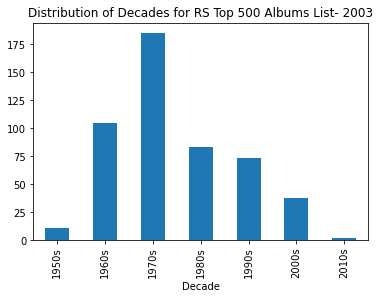

In [6]:
decade_counts_2003.plot(kind="bar")
plt.title('Distribution of Decades for RS Top 500 Albums List- 2003')
plt.xlabel('Decade')

Text(0.5, 0, 'Decade')

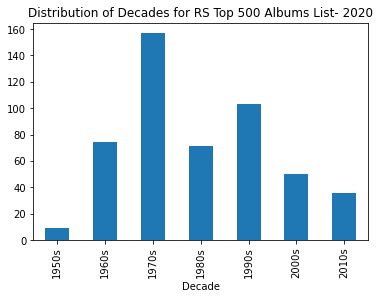

In [7]:
decade_counts_2020.plot(kind="bar")
plt.title('Distribution of Decades for RS Top 500 Albums List- 2020')
plt.xlabel('Decade')

After looking at the distribution of decades for each list, there is definitely a bias for older albums on the 2003 list, while there are a greater amount of current albums in the 2020 list. This is sensible, since there have been an abundance of great albums released in the 17 year span from the first list to the most recent list.

# Which albums are the biggest risers and fallers?

In [8]:
#I noticed a parsing error for apostrophes. Some album titles/artists had ('), and others had (’)(option+shift+]).
#This code will fix these errors to make the apostrophes consistent.
list_2003 = list_2003.replace("\’", "'", regex=True)
list_2020 = list_2020.replace("\’", "'", regex=True)

In [9]:
#Merging Lists together by Album Title/Artist
list_merge = list_2003.merge(list_2020, how='outer', on=('Album', 'Artist'), suffixes=('_2003','_2020'))

#Keeping/Renaming Neccesary Variables for this analysis
list_merge = list_merge[['Album', 'Artist', 'Rank_2003', 'Rank_2020']]

#Determining the Difference Between Ranks
list_merge['Rank_diff'] = list_merge['Rank_2003'] - list_merge['Rank_2020']

In [10]:
#I also noticed very minor differences in some album titles/arists i.e "White Album" vs "The White Album".
#These titles need to be cleaned before they can be compared
#I will import in excel and fix these manually and re-import once it's done.
list_2003.to_excel('list_2003.xlsx')
list_2020.to_excel('list_2020.xlsx')
list_merge.to_excel('list_merge.xlsx')

In [11]:
#Uplading Fixed Data Frames
list_2003_fixed = pd.read_excel('list_2003_fixed.xlsx')
list_2020_fixed = pd.read_excel('list_2020_fixed.xlsx')

In [12]:
list_merge_fixed = list_2003_fixed.merge(list_2020_fixed, how='outer', on=('Album', 'Artist'), suffixes=('_2003','_2020'))

#Keeping/Renaming Neccesary Variables for this analysis
list_merge_fixed = list_merge_fixed[['Album', 'Artist', 'Rank_2003', 'Rank_2020']]

#Determining the Difference Between Ranks
list_merge_fixed['Rank_diff'] = list_merge_fixed['Rank_2003'] - list_merge_fixed['Rank_2020']

In [13]:
#Which album was the biggest riser?
list_merge_fixed.loc[list_merge_fixed['Rank_diff'] == list_merge_fixed['Rank_diff'].max()]

,Album,Artist,Rank_2003,Rank_2020,Rank_diff
19,Voodoo,D'Angelo,481.0,28.0,453.0


In [14]:
#Which album was the biggest faller?
list_merge_fixed.loc[list_merge_fixed['Rank_diff'] == list_merge_fixed['Rank_diff'].min()]

,Album,Artist,Rank_2003,Rank_2020,Rank_diff
462,The Anthology,Muddy Waters,38.0,483.0,-445.0


In [15]:
#Which album that wasn't on the 2003 list made the highest debut on the 2020 list? (Highest Debut)
null_2003 = list_merge_fixed.loc[list_merge_fixed['Rank_2003'].isnull()]
null_2003.loc[null_2003['Rank_2020']==null_2003['Rank_2020'].min()]

,Album,Artist,Rank_2003,Rank_2020,Rank_diff
670,To Pimp a Butterfly,Kendrick Lamar,NaN,19.0,NaN


In [16]:
#Which album was the highest ranked in 2003 that did not make the 2020 list? (Worst Dropout)
null_2020 = list_merge_fixed.loc[list_merge_fixed['Rank_2020'].isnull()]
null_2020.loc[null_2020['Rank_2003']==null_2020['Rank_2003'].min()]

,Album,Artist,Rank_2003,Rank_2020,Rank_diff
478,The Complete Recordings,Robert Johnson,22.0,NaN,NaN


The Biggest Riser: "Voodoo" by D'Angelo (481 -> 28)

Biggest Faller: "The Anthology" by Muddy Waters (38 -> 483)

Highest Debut: "To Pimp a Butterfly" by Kendrick Lamar (Debuted at 19)

Worst Dropout: "The Complete Recordings" by Robert Johnson (Ranked 22 in 2003, didn't make the 2020 list)